#   [Py4Hw User Guide](../UserGuide.ipynb)> 1.2 Object Oriented Approach

All Logic blocks inherit from the class Logic.
When you create a Hardware block you must create a class inheriting from Logic.
Each object must have a parent and a name. This is implemented in the base class, so the constructor of your block must call the base class's constructor with parent and name.

In [1]:
import sys
import platform
if (platform.uname().node == 'TPY14'):
    print('Dev machine')
    sys.path.append('..\\..\\..\\py4hw')

Dev machine


In [6]:
import py4hw

class Example(py4hw.Logic):
    
    def __init__(self, parent, name):
        super().__init__(parent, name)
        
        # Do whatever you need here
        # for instance, now we are going to create a number of outputs
        for i in range(10):
            self.addOut('out{}'.format(i), None)

Contrary to many other HDL languages, in py4hw, hardware circuits do not have an explicit (static) interface. The interface is created during runtime as needed by the generator code.
This allows to do complex things that would be impossible otherwise.

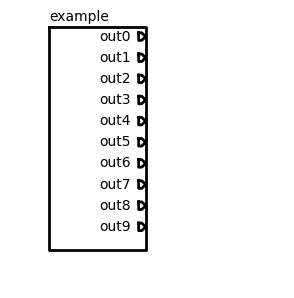

In [8]:
sys = py4hw.HWSystem()
example = Example(sys, 'example')
#py4hw.debug.printHierarchy(example)
sch = py4hw.Schematic(sys)
sch.draw()

This also allows complex behaviour like circuit modification and manipulation.
Imagine you now need an input to the previous circuit

In [ ]:
example.addIn()